In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('spam.csv')
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [3]:
df.Category.value_counts()

Category
ham     4825
spam     747
Name: count, dtype: int64

In [4]:
from sklearn.model_selection import train_test_split
X= df['Message']
y = df['Category']

In [5]:
X.head()

0    Go until jurong point, crazy.. Available only ...
1                        Ok lar... Joking wif u oni...
2    Free entry in 2 a wkly comp to win FA Cup fina...
3    U dun say so early hor... U c already then say...
4    Nah I don't think he goes to usf, he lives aro...
Name: Message, dtype: object

In [6]:
y.head()

0     ham
1     ham
2    spam
3     ham
4     ham
Name: Category, dtype: object

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.2, random_state=5)

In [8]:
from sklearn.feature_extraction.text import CountVectorizer
v = CountVectorizer()
X_train_count = v.fit_transform(X_train)
X_test_count = v.transform(X_test)

In [9]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(X_train_count, y_train)

MultinomialNB()

### Model Evaluation: precision, Recall, F1 Score

In [10]:
y_preds = model.predict(X_test_count)
y_preds[:5]

array(['spam', 'ham', 'spam', 'ham', 'ham'], dtype='<U4')

In [11]:
from sklearn.metrics import classification_report
y_preds = model.predict(X_test_count)
report = classification_report(y_test, y_preds)

In [12]:
print(report)

              precision    recall  f1-score   support

         ham       0.99      1.00      1.00       970
        spam       0.98      0.96      0.97       145

    accuracy                           0.99      1115
   macro avg       0.99      0.98      0.98      1115
weighted avg       0.99      0.99      0.99      1115



### Confusion Matrix

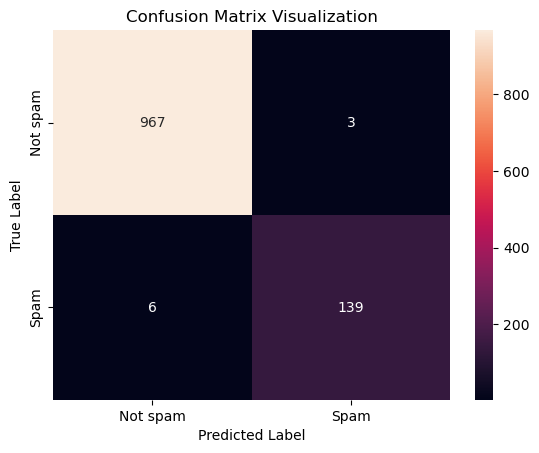

In [13]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, y_preds)
sns.heatmap(cm, annot=True, fmt = 'd', xticklabels = ['Not spam', 'Spam'], yticklabels = ['Not spam', 'Spam'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix Visualization')
plt.show()

In [14]:
from sklearn.pipeline import Pipeline
pipe = Pipeline([
    ('count_vectorizer', CountVectorizer()),
    ('nb_classifier', MultinomialNB())
])

pipe.fit(X_train, y_train)
y_preds = pipe.predict(X_test)
report = classification_report(y_test, y_preds)
print(report)

              precision    recall  f1-score   support

         ham       0.99      1.00      1.00       970
        spam       0.98      0.96      0.97       145

    accuracy                           0.99      1115
   macro avg       0.99      0.98      0.98      1115
weighted avg       0.99      0.99      0.99      1115

